<a href="https://colab.research.google.com/github/mobinapourmoshir/Functional-Deep-Learning/blob/main/ML_Classifiers_Using_Scikit_Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Chapter 3: A Tour of Machine Learning Classifiers Using Scikit-Learn**

Machine Learning with PyTorch and Scikit-Learn: Develop Machine Learning and Deep Learning Models with Python
Book by Liu Yuxi, Sebastian Raschka, and Vahid Mirjalili


Main Ideas of Chapter 3

**Overview of Popular Classifiers:**
The chapter introduces widely used supervised learning algorithms for classification, including:

1. Logistic Regression

2. Support Vector Machines (SVMs)

3. Decision Trees

4. k-Nearest Neighbors (k-NN)

Each has its strengths, weaknesses, and assumptions, and choosing the right one depends on your data and task.

**No Free Lunch Theorem:**
There's no single best classifier for all problems. Performance depends heavily on:

- Data size and quality
- Feature selection
- Noise level
- Whether data is linearly separable

Always try and compare multiple algorithms.

**Five Steps of Supervised Learning:**
Building a classification model usually involves:

1. Selecting features and collecting labeled data
2. Choosing a performance metric (e.g., accuracy)
3. Choosing an algorithm and training a model
4. Evaluating model performance
5. Tuning hyperparameters for better results

**Using Scikit-Learn:**
The chapter demonstrates how to use scikit-learn's simple and consistent API to train models. As a first example, it shows how to train a perceptron classifier (from Chapter 2) with scikit-learn (a foundational model in ML).

**Iris Dataset as a Teaching Tool:**
The well-known Iris dataset is used throughout the chapter for hands-on examples. It's simple yet effective for illustrating model training, evaluation, and visualization.

In [1]:
# Iris data
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [3]:
# Splitting data to test and train (test size is 30% of the data)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
    )
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


**Feature scaling for optimal performance(eg: gradient descent)**

- fit() calculates the mean (μ) and standard deviation (σ) of each feature from the training data.
- transform() uses those values to standardize the data (so it has mean 0 and variance 1).
- We must use the same μ and σ to scale the test data so results are comparable.

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

-----
## **Training the Perceptron:**
A Perceptron is one of the simplest types of artificial neural networks — and also one of the earliest machine learning algorithms. It's a linear classification model used to decide between two or more classes based on input features.

- Type: Linear classification model
- Category: Supervised learning (classification)
- Nature: Shallow neural network (only one layer of weights)
- Decision boundary: Linear (a straight line or hyperplane)
- Simple and fast to train
- Works well for linearly separable data
- Foundation for more complex neural networks
- Can't handle nonlinear problems (e.g., XOR)
- Sensitive to feature scaling (that's why we standardize data first)

Think of the perceptron as a simple mathematical function that:
1. Takes several input features (numbers describing your data, like petal length, petal width, etc.).
2. Multiplies them by weights (these are learned from the data).
3. Sums them up and adds a bias term.
4. Passes the result into a step function that outputs a class label (e.g., 0 or 1).


In [5]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

# Prediction
y_pred = ppn.predict(X_test_std)
print('Misclassified examples: %d' % (y_test != y_pred).sum())

Misclassified examples: 1


In [6]:
# Accuracy Score
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.978


Each classifier in scikit-learn has a score method, which computes a classifier's prediction accuracy by combining the predict call with *accuracy_score*, as shown here:

In [7]:
print('Accuracy: %.3f' % ppn.score(X_test_std, y_test))

Accuracy: 0.978


In [11]:
# Defining plot function
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_regions(X, y, classifier, test_idx=None,
                          resolution=0.02):
  # setup marker generator and color map
  markers = ('o', 's', '^', 'v', '<')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])
  # plot the decision surface
  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                        np.arange(x2_min, x2_max, resolution))
  lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  lab = lab.reshape(xx1.shape)
  plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())
  # plot class examples
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0],
                y=X[y == cl, 1],
                alpha=0.8,
                c=colors[idx],
                marker=markers[idx],
                label=f'Class {cl}',
                edgecolor='black')
  # highlight test examples
  if test_idx:
    # plot all examples
    X_test, y_test = X[test_idx, :], y[test_idx]
  plt.scatter(X_test[:, 0], X_test[:, 1],
              c='none', edgecolor='black', alpha=1.0,
              linewidth=1, marker='o',
              s=100, label='Test set')

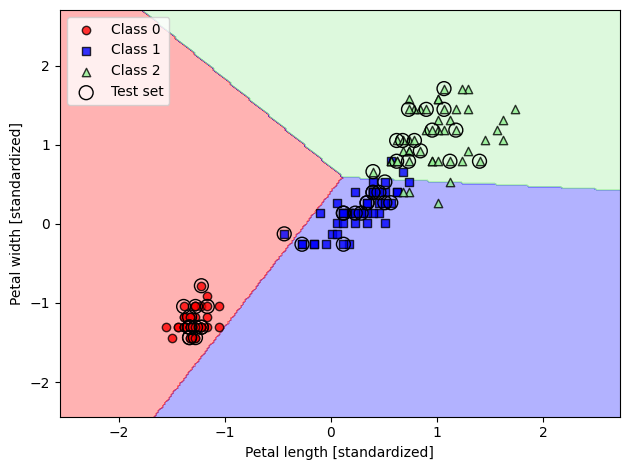

In [12]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std,
y=y_combined,
classifier=ppn,
test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

**Additional perceptron settings:**
The Perceptron, as well as other scikit-learn functions and classes, often has additional
parameters that we omit for clarity. You can read more about those parameters using
the help function in Python (for instance, help(Perceptron)) or by going through the
excellent scikit-learn online documentation at http://scikit-learn.org/stable/.

----
## **Modeling class probabilities via logistic regression**
- Purpose: Logistic regression is a simple but powerful model for binary classification that estimates the probability that a sample belongs to a particular class.
- It's called “regression” historically, but it's actually a classification model.
- Unlike the perceptron, logistic regression converges even if data isn't perfectly separable.
- It models the conditional probability  p(y=1|x) directly and outputs a value between 0 and 1.

Logistic regression predicts the probability that a sample belongs to class 1.
It models the log-odds of this probability as a linear combination of features:

$\text{logit}(p) = log(\frac{p}{1-p}) = w_1*x_1 + w_2*x_2 + ... + w_m*x_m + b = \sum_{i=j}w_jx_j +b = \mathbf{w}^⊤ \mathbf{x} +b$

The inverse of this (sigmoid) maps any real number to a probability (0, 1):

$p = \frac{1}{1 + exp(-(w·x + b))}$

Finally, we classify based on a threshold (usually 0.5):

$y_{hat} = 1 $ if $p >= 0.5 $ else $0$

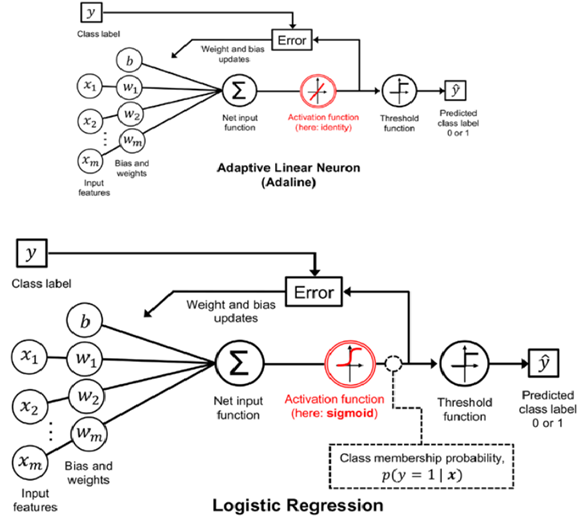